## **FINAL PROJECT**: Classification and Regression on Wine Quality Dataset

In [69]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv(r"wine+quality\winequality-white.csv", sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


---

## **Exploratory Data Analysis**

In this step of the project, I will answer some questions that will help me decide which models to use, and how to adapt them better to the dataset I am dealing with:
1. **Is the dataset balanced or inbalanced?** This will show me how to handle the classification task, when data inbalance affects models' performance a lot.
2. **How is data distributed in the multi-dimensional space?** Are features linearly separable based on the class? This will tell me if distance-based models like KNN might give a better performance compared to linear ones (Logistic Regression).
3. **Are there any correlated features?** This might affect the performance of the models: for linear algorithms (for classification), like Logistic Regression, multicolinearity can cause the coefficients of the correlated features to become unstable, while for KNN correlated features can affect distances: if two features are highly correlated, the “distance” between points might be dominated by those correlated dimensions, giving them more influence than they should have.
4. **Is there a liniar relationship between the features and the target?** This shows if the relationhip between features and the "continuous" target can be modelled using a linear model or not.


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [72]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


**1. Is the dataset balanced or inbalanced? (for classification)**

In [73]:
quality_counts = df['quality'].value_counts().sort_index()
print(quality_counts)


quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64


**Observation:** For the classification task, the target must be a categorical feature. In order to do that, I will engineer a new target for the classification task using the original `quality` feature, which is numerical. I will establish a threshold, and everything equal or higher than the threshold will be considered a 'good wine', while everything below the threshold will be considered a 'bad wine'. Since the median value is 6.00, meaning that 50% of the data is below and 50% is above this value, I will use it as the threshold.

In [74]:
df["quality_class"] = (df["quality"] >= 6).astype(int)
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [75]:
quality_class_counts = df['quality_class'].value_counts().sort_index()
print(quality_class_counts)

quality_class
0    1640
1    3258
Name: count, dtype: int64


**Observation:** Setting the median as the threshold in this case helped with the inbalance, however it did not solve the problem. Therefore, when building the classification models I will try to manage this issue by using a weighted approach for both Logistic Regression and KNN.

**2. How is data distributed?**

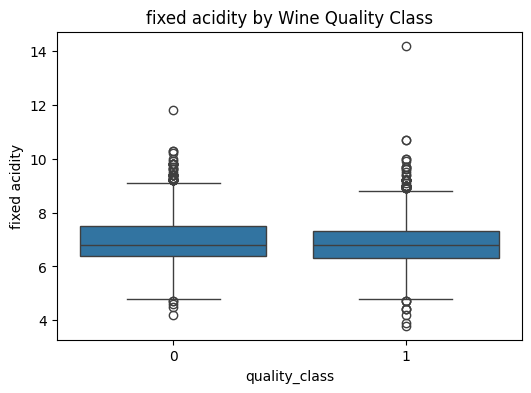

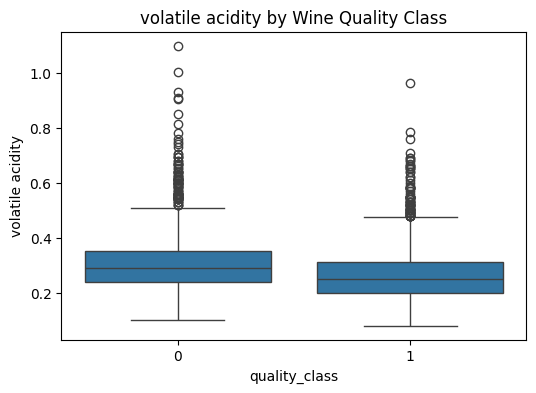

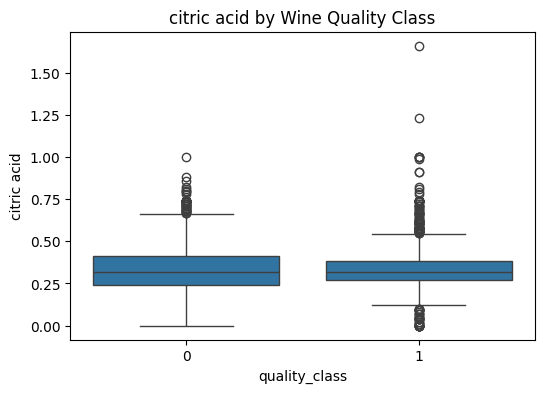

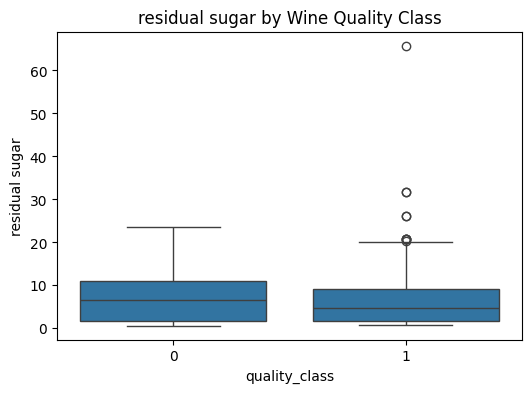

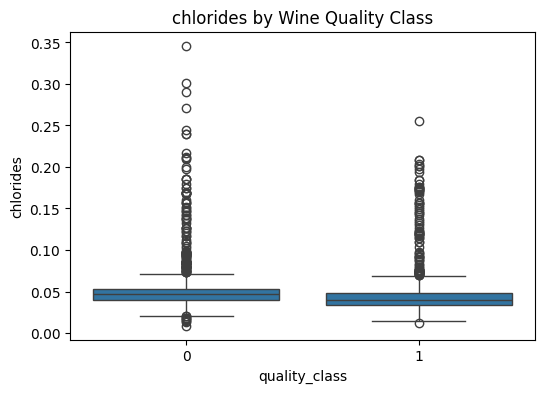

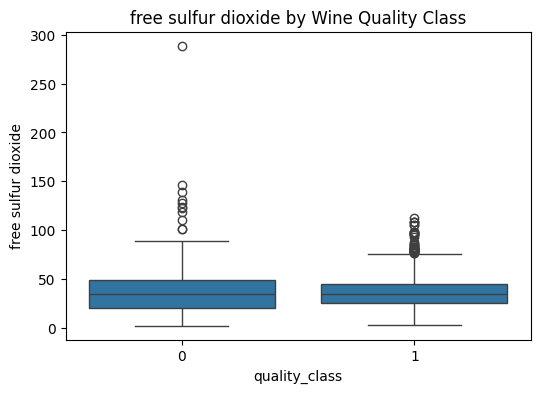

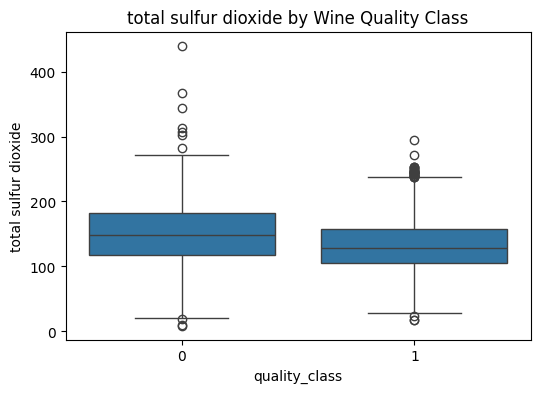

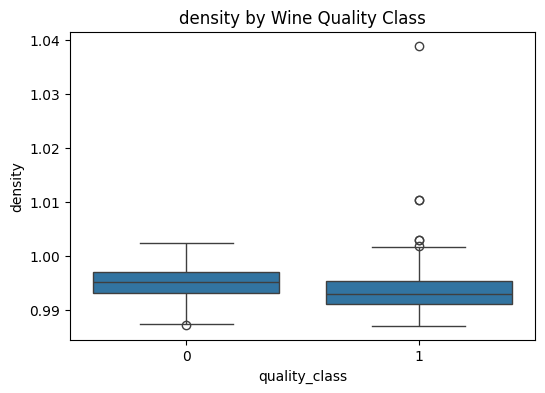

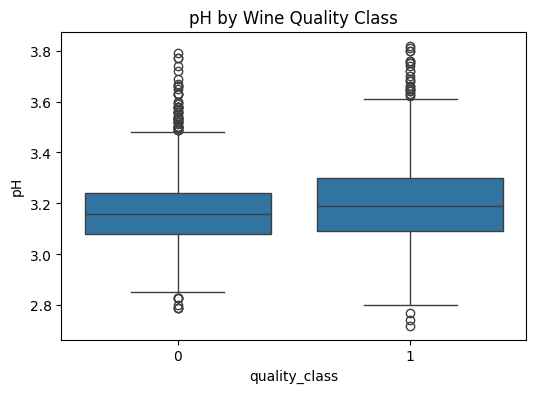

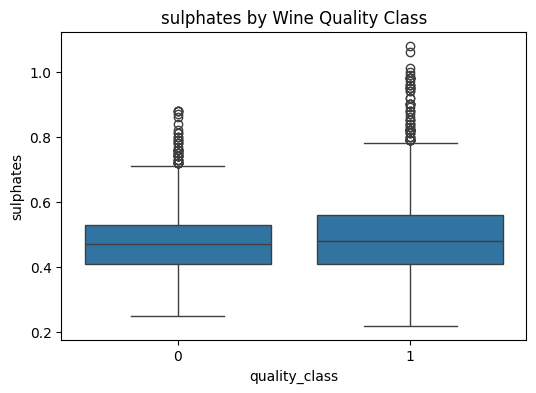

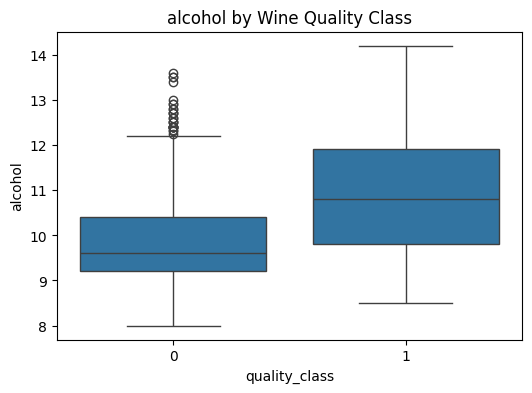

In [76]:
# Boxplots for all features against quality_class
feature_cols = df.drop(columns=["quality", "quality_class"]).columns

for col in feature_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="quality_class", y=col, data=df)
    plt.title(f'{col} by Wine Quality Class')
    plt.show()


**Observation:** By looking at the boxplots separated by class, it can be observed that:
* the medians are close
* the interquartile ranges overlap a lot
* there is no clear gap between the two classes

This indicates that the classes might not be clearly separable using simple linear boundaries based on individual features. Such overlap suggests that linear models like Logistic Regression may struggle to fully capture the class structure, while models that can handle more complex decision boundaries, such as KNN, may be better suited for this task.

From these plots we can also observe that values of the features have very different ranges --> they need scaling before being inputed into the model.


3. **Are there any correlated features?**

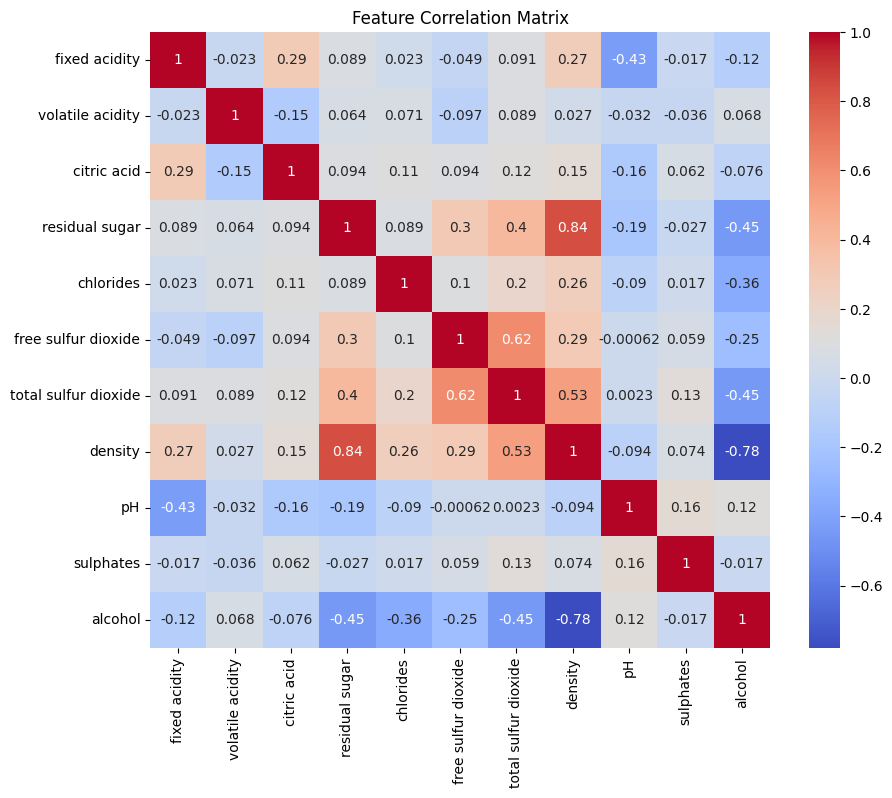

In [77]:
corr = df.drop(columns=['quality','quality_class']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

**Observation:** Correlations above 0.7 can be considered indicative of strong linear relationships between features, which may lead to multicollinearity in linear models such as Logistic Regression. 

A strong correlation was observed between residual sugar and density, which may introduce multicollinearity for Logistic Regression. However, since the objective is to compare the performance of the models rather than interpret individual coefficients, and both models are trained on the same feature set for fairness, I will keep both .

4. **Is there a liniar relationship between the features and the target?**

To answer this I will compute Pearson correlation coefficients between the target and each feature — they measure linear relationships. Strong correlations indicate a linear trend, weak correlations might be nonlinear or noisy.

In [78]:
corr = df.corr()["quality"].sort_values(ascending=False)
print(corr)

quality                 1.000000
quality_class           0.802541
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


**Observation:** Here it can be observed that the relationships between the features and the quality target are very weak. The strongest is alcohol at ~0.44, then density at ~-0.31, and everything else is very small. Meaning that for regression, a liniar model wouldn't perform very well since it requires liniar relations between features and the target.

---

## **Classification task**

For the classification task, I chose **Logistic Regression** and **K-Nearest Neighbors (KNN)** as the two models to compare.

`Logistic Regression` is a linear model that estimates the probability of a wine being “good” based on a weighted combination of its features, making it simple and interpretable. 

`KNN` is a non-parametric, instance-based model that predicts a wine’s class based on the classes of its closest neighbors in feature space, allowing it to capture nonlinear relationships. 

Initially, both models will be trained with default hyperparameters to establish an initial performance. Since the dataset is imbalanced, I introduced modifications to better account for the minority class: Logistic Regression will be trained with `class_weight='balanced'`, which increases the importance of good-quality wines in the loss function, and KNN will be used with `distance-based weighting` to give closer neighbors more influence and therefore give the minority class more influence. 

Afterwards, I will perform hyperparameter tuning was using GridSearchCV combined with k-fold cross-validation, optimizing the F1-score to ensure a balance between precision and recall. 

In [79]:
from sklearn.model_selection import train_test_split

def split_test_set(X, y, test_size=0.2, random_state=42):
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    return X_trainval, X_test, y_trainval, y_test


**Explanation:** The dataset is divided into two subsets: a train+validation set and a test set. The split is done in a stratified manner, meaning that the proportion of good and not-good wines is preserved in both subsets. This is especially important for this classification task because the dataset is imbalanced, and stratification ensures that both subsets remain representative of the original data distribution.

The test set is kept aside and is only used at the very end to evaluate the final model. The train+validation subset is not split further at this stage because it will later be used in k-fold cross-validation during hyperparameter tuning. Cross-validation internally creates multiple training and validation splits, making an additional manual split unnecessary.

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_classifier(model, X, y):
    y_pred = model.predict(X)
    return {
        "accuracy": accuracy_score(y, y_pred),
        "precision": precision_score(y, y_pred),
        "recall": recall_score(y, y_pred),
        "f1": f1_score(y, y_pred)
    }


**Explanation:** 
The function returns the following metrics together for easier comparison between models:
* Accuracy shows the overall proportion of correctly classified samples. 
* Precision measures how many of the wines predicted as “good” are actually good. 
* Recall indicates how many of the truly good wines were correctly identified by the model. 
* F1-score combines precision and recall into a single metric, making it especially useful for this task since the dataset is imbalanced. 

In [81]:
from sklearn.linear_model import LogisticRegression

def logistic_model(X, y, penalty=None, C=1.0, solver='lbfgs', class_weight=None, max_iter=1000, random_state=42):
    model = LogisticRegression(penalty=penalty, C=C, solver=solver, class_weight=class_weight, max_iter=max_iter, random_state=random_state)
    model.fit(X, y)
    return model


In [82]:
from sklearn.model_selection import GridSearchCV

def logistic_tuning(X, y, cv=5, max_iter=1000):
    param_grid = {
        "C": [0.01, 0.1, 1, 10, 100],
        "penalty": ["l2"],
        "solver": ["lbfgs"],
        "class_weight": [None, "balanced"]
    }

    model = LogisticRegression(max_iter=max_iter)

    grid = GridSearchCV(model, param_grid, cv=cv, scoring="f1", n_jobs=-1)

    grid.fit(X, y)
    
    return grid.best_estimator_, grid.best_params_


In [83]:
from sklearn.neighbors import KNeighborsClassifier

def knn_model(X, y, n_neighbors=3, weights='uniform', metric='euclidean'):
    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
    model.fit(X, y)
    return model


In [84]:
def knn_tuning(X, y, cv=5):
    param_grid = {
        "n_neighbors": [3, 5, 7, 9, 11, 15],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan", "minkowski"]
    }

    model = KNeighborsClassifier()

    grid = GridSearchCV(model, param_grid, cv=cv, scoring="f1", n_jobs=-1)

    grid.fit(X, y)
    
    return grid.best_estimator_, grid.best_params_


**Explanation:** 

The `logistic_model` and `knn_model` functions train a model using a set of default hyperparameters. This is done in order to conduct initial experiments with random starting parameters, which satisfies the requirments of task 3.

The `logistic_tuning` and `knn_tuning` perform hyperparameter tuning for Logistic Regression and KNN using GridSearchCV combined with k-fold cross-validation. A grid of possible values for the hyperparameters is defined. For each combination of hyperparameters, the model is trained and evaluated across multiple folds, and the average F1-score is computed.
The F1-score is used as the optimization metric because it provides a balanced evaluation of precision and recall, which is important for this imbalanced dataset. After testing all combinations, the function returns the model with the best-performing hyperparameters along with the selected parameter values.

---

* For this classification task, I will use the binary categorical variable `quality_class` as the label. How data is distributed across the classes was already determined in the EDA phase;

In [85]:
X = df.drop(columns=["quality", "quality_class"])
y = df["quality_class"]

* Splitting the data in a stratified manner considering the inbalance of the data;

In [86]:
X_trainval, X_test, y_trainval, y_test = split_test_set(X, y)

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trainval_scaled = scaler.fit_transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

**Explanation:** Before training the models, the features are standardized using `StandardScaler`. This scaling process transforms each feature so that it has a mean of 0 and a standard deviation of 1. Feature scaling is important because the variables in the wine dataset are measured on different scales (for example, alcohol content and acidity), and models that rely on distances or optimization, such as KNN and Logistic Regression, can be strongly affected by these differences.

* Creating the initial experiments using the default values for the hyperparameters;

In [88]:
logistic_baseline = logistic_model(X_trainval_scaled, y_trainval)
knn_baseline = knn_model(X_trainval_scaled, y_trainval)

print("BASELINE TEST RESULTS")
for name, model in {"LogReg baseline": logistic_baseline, "KNN baseline": knn_baseline}.items():
    scores = evaluate_classifier(model, X_test_scaled, y_test)
    print(name, scores)

BASELINE TEST RESULTS
LogReg baseline {'accuracy': 0.7408163265306122, 'precision': 0.771117166212534, 'recall': 0.8680981595092024, 'f1': 0.8167388167388168}
KNN baseline {'accuracy': 0.7673469387755102, 'precision': 0.8126843657817109, 'recall': 0.8450920245398773, 'f1': 0.8285714285714286}


c:\Users\cazal\OneDrive\Documents\FACULTATE\ANUL III\Erasmus Latvia\Uni\Machine Learning\Final_Homework\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


* Tuning the models using k-fold cross validation and GridSearchCV;

In [89]:
logistic_tuned, log_best_params = logistic_tuning(X_trainval_scaled, y_trainval)
knn_tuned, knn_best_params = knn_tuning(X_trainval_scaled, y_trainval)

print("Best Logistic Regression params:", log_best_params)
print("Best KNN params:", knn_best_params)

c:\Users\cazal\OneDrive\Documents\FACULTATE\ANUL III\Erasmus Latvia\Uni\Machine Learning\Final_Homework\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


Best Logistic Regression params: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
Best KNN params: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


* Applying the best hyperparameters identified using the method described above on the test set;

In [90]:
print("\nTUNED TEST RESULTS")
for name, model in {"LogReg tuned": logistic_tuned, "KNN tuned": knn_tuned}.items():
    scores = evaluate_classifier(model, X_test_scaled, y_test)
    print(name, scores)


TUNED TEST RESULTS
LogReg tuned {'accuracy': 0.7438775510204082, 'precision': 0.7720488466757124, 'recall': 0.8726993865030674, 'f1': 0.8192944564434845}
KNN tuned {'accuracy': 0.8408163265306122, 'precision': 0.8583815028901735, 'recall': 0.911042944785276, 'f1': 0.8839285714285714}


**Conclusion:** 

For `Logistic Regression`, the initial model with default parameters had already a good performance (F1-score ans Accuracy). After introducing class weighting and tuning the hyperparameters, the F1-score improved only slightly, as it depends very much on whether the classes are liniarly separable (and as I have found in the EDA phase, they tend to overlap).

For `K-Nearest Neighbors (KNN)`, the model benefited from its distance-based, non-linear approach. Initially, it already outperformed Logistic Regression in detecting good wines, and after tuning hyperparameters such as the number of neighbors and weighting, both its F1-score and accuracy increased. Because KNN can naturally handle nonlinear boundaries and emphasize minority-class samples through distance weighting, it is better suited for this dataset, especially given the imbalance.

Overall, KNN showed the best performance in balancing precision and recall. The improvements in F1-score for both models highlight the importance of accounting for class imbalance, but KNN’s flexible, distance-based approach makes it more effective at identifying good-quality wines in this dataset.

---

## **Regression task**

For the regression task, I chose Ridge Regression and K-Nearest Neighbors (KNN) Regression as the two models to compare.

`Ridge Regression` is a linear model that estimates the continuous wine quality score by finding a weighted combination of features while penalizing large coefficients through regularization (alpha). This helps reduce overfitting and keeps the model stable when features are correlated (as observed in the EDA phase of the project). It is simple, interpretable, and works well when the relationship between features and the target is roughly linear.

`KNN Regression` is a non-parametric, instance-based model that predicts a wine’s quality by averaging the scores of its closest neighbors in feature space. This allows it to capture nonlinear relationships and interactions between features that linear models may miss.

The training and tuning method will be the same as in the classification task.

**Important observation**: The target variable quality is a discrete variable taking integer values from 3 to 9. Although it is treated as continuous for the regression task, it is in fact ordinal and has only a few possible values. This might limit the performance of the regression models...

In [91]:
def split_test_set_regression(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regressor(model, X, y):
    y_pred = model.predict(X)
    return {
        "MAE": mean_absolute_error(y, y_pred),
        "MSE": mean_squared_error(y, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y, y_pred)),
        "R2": r2_score(y, y_pred)
    }

**Explanation:** This function calculates several common metrics to evaluate the performance of a regression model:

`MAE (Mean Absolute Error)`: Measures the average absolute difference between the predicted and actual values. Lower MAE means the model’s predictions are closer to the true values.

`MSE (Mean Squared Error)`: Measures the average squared difference between predictions and actual values. It penalizes larger errors more than smaller ones, so it highlights models that occasionally make big mistakes.

`RMSE (Root Mean Squared Error)`: The square root of MSE. It is in the same units as the target variable and also penalizes large errors, giving a sense of typical prediction error magnitude.

`R² (R-squared score)`: Indicates how much of the variation in the target variable is explained by the model. Values closer to 1 mean the model explains most of the variance, while values near 0 mean the model barely improves over simply predicting the mean.

In [93]:
from sklearn.linear_model import Ridge

def ridge_model(X, y, alpha=1.0, random_state=42):
    model = Ridge(alpha=alpha, random_state=random_state)
    model.fit(X, y)
    return model


In [94]:
def ridge_tuning(X, y, cv=5):
    param_grid = {
        "alpha": [0.01, 0.1, 1, 10, 100]
    }

    model = Ridge()

    grid = GridSearchCV(model, param_grid, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1)

    grid.fit(X, y)
    
    return grid.best_estimator_, grid.best_params_


In [95]:
from sklearn.neighbors import KNeighborsRegressor

def knn_regression_model(X, y, n_neighbors=5, weights="uniform", metric="euclidean"):
    model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, metric=metric)
    model.fit(X, y)
    return model


In [96]:
def knn_regression_tuning(X, y, cv=5):
    param_grid = {
        "n_neighbors": [3, 5, 7, 9, 11, 15],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan", "minkowski"]
    }

    model = KNeighborsRegressor()

    grid = GridSearchCV(model, param_grid, cv=cv, scoring="neg_mean_squared_error",n_jobs=-1)

    grid.fit(X, y)
    
    return grid.best_estimator_, grid.best_params_


---

In [97]:
X = df.drop(columns=["quality", "quality_class"])
y = df["quality"]

In [98]:
X_trainval, X_test, y_trainval, y_test = split_test_set_regression(X, y)

In [99]:
scaler = StandardScaler()
X_trainval_scaled = scaler.fit_transform(X_trainval)
X_test_scaled = scaler.transform(X_test)


In [100]:
ridge_baseline = ridge_model(X_trainval_scaled, y_trainval)
knn_reg_baseline = knn_regression_model(X_trainval_scaled, y_trainval)

print("BASELINE REGRESSION RESULTS")
for name, model in {"Ridge baseline": ridge_baseline, "KNN regression baseline": knn_reg_baseline}.items():
    scores = evaluate_regressor(model, X_test_scaled, y_test)
    print(name, scores)

BASELINE REGRESSION RESULTS
Ridge baseline {'MAE': 0.5863182110425901, 'MSE': 0.5691073466101487, 'RMSE': np.float64(0.7543920377430747), 'R2': 0.2651683834929809}
KNN regression baseline {'MAE': 0.5236734693877552, 'MSE': 0.4768979591836735, 'RMSE': np.float64(0.690577989211699), 'R2': 0.38422917865459183}


In [101]:
ridge_tuned, ridge_best_params = ridge_tuning(X_trainval_scaled, y_trainval)
knn_reg_tuned, knn_reg_best_params = knn_regression_tuning(X_trainval_scaled, y_trainval)

print("Best Ridge params:", ridge_best_params)
print("Best KNN Regression params:", knn_reg_best_params)


Best Ridge params: {'alpha': 10}
Best KNN Regression params: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


In [102]:
print("\nTUNED REGRESSION RESULTS")
for name, model in {
    "Ridge tuned": ridge_tuned,
    "KNN regression tuned": knn_reg_tuned
}.items():
    scores = evaluate_regressor(model, X_test_scaled, y_test)
    print(name, scores)



TUNED REGRESSION RESULTS
Ridge tuned {'MAE': 0.586743087293715, 'MSE': 0.5697840321399891, 'RMSE': np.float64(0.7548404017671477), 'R2': 0.2642946468864842}
KNN regression tuned {'MAE': 0.37995478089371065, 'MSE': 0.3525473003811958, 'RMSE': np.float64(0.593756937122587), 'R2': 0.5447907953088442}


**Final Observation**:

In this regression task, we compared Ridge Regression and KNN Regression to predict wine quality. Ridge, being a linear model, performed poorly and tuning barely improved it. This makes sense because, as we saw in EDA, there isn’t a strong linear relationship between the features and the quality, so a linear model can’t capture the patterns well. Ridge does help with multicollinearity, but that wasn’t the main issue here.

KNN Regression, which can model nonlinear relationships, performed much better. Tuning the number of neighbors and using distance-based weighting improved its performance, showing how flexible models can better adapt to the data.

However, **both models are limited by the nature of the target**: wine quality isn’t truly continuous, but rather discrete—it only takes integer values from 3 to 9. This makes it harder for regression to predict perfectly, no matter how well the model is tuned.

Because of this, classification (“good” vs “not good” wines) is more suitable for this dataset. It matches the way the data is structured and allows models to perform better. So even though KNN works better than Ridge (in both tasks), regression in general struggles here due to the discrete nature of the target.